In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fim import apriori
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
import imblearn
import seaborn as sns

In [157]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dalle regole
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")
        # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________") 
    ax= plt.subplot()
    cm = confusion_matrix(y_true, y_pred, [0, 1], normalize ="true")
    print(cm)
    sns.heatmap(cm, annot=True, ax = ax, cmap = plt.get_cmap('Blues'))

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Non_Attrition', 'Attrition']); ax.yaxis.set_ticklabels(['Not_Attrition', 'Attrition'])

In [159]:
path = "../DataSet/"
df = pd.read_csv(path + 'Dataset_Final.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,NotValid,TotalSatisfaction,ProbablyLeave
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,20,2.0,2,8.0,7,2,13,False,11,0
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,21,3.0,3,1.0,8,1,6,True,11,1
2,36.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,7,4.0,3,1.0,5,1,2,False,13,0
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,12,1.0,3,3.0,7,0,7,False,9,1
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,2,3.0,3,10.0,2,2,1,True,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,38.0,No,Travel_Rarely,890,Sales,2,3,Marketing,4,Male,...,2,3.0,3,8.0,2,2,2,True,12,0
1466,44.0,No,Travel_Rarely,1111,Sales,8,2,Life Sciences,3,Male,...,6,5.0,3,4.0,2,1,2,False,9,0
1467,30.0,No,Travel_Rarely,163,Research & Development,24,1,Technical Degree,4,Male,...,9,3.0,2,1.0,4,1,4,False,15,0
1468,36.0,No,Travel_Frequently,457,Research & Development,26,2,Other,2,Male,...,4,3.0,2,8.0,2,1,3,True,9,1


## ---- Preprocessing dei dati
Applicazione dei Binning alle variabili continue

Dividere in 5 range MonthlyIncome: Very Low; Low; Medium; High; Very High

In [160]:
def toRange_MonthlyIncome(df):
    ll = df['MonthlyIncome'].values
    monthly_range = []
    for i in ll:
        if i < 5000:
            monthly_range.append("Very Low")
        elif i < 9000:
            monthly_range.append("Low")
        elif i < 13000:
            monthly_range.append("Medium")
        elif i < 17000:
            monthly_range.append("High")
        else:
            monthly_range.append("Very High")
    return monthly_range

In [161]:
df["MonthlyIncome_Range"] = toRange_MonthlyIncome(df)

Divido in 4 bin le variabili YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [162]:
def toRange_Years(df, years_toBin):
    dt = {}
    for i in years_toBin:
        ll = df[i].values
        dt[i+"_Range"]=[]
        for x in ll:
            if x <= 4:
                dt[i+"_Range"].append("<=4")
            elif x <= 8:
                dt[i+"_Range"].append(">4 <=8")
            elif x <= 12:
                dt[i+"_Range"].append(">8 <=12")
            else:
                dt[i+"_Range"].append(">12")
    return dt
        #df[i+"_Range"] = _range

In [163]:
years_toBin = ["YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
ll = toRange_Years(df, years_toBin)
for i in years_toBin:
    df[i+"_Range"] = ll[i+"_Range"]

Divido in bin le features:
- DistanceFromHome
- Age
- PercentSalaryHike
- TotalWorkingYears
- TotalSatisfaction

In [164]:
df['DistanceFromHome_Range'] = pd.qcut(df['DistanceFromHome'], q=4, labels=['<=2', '>2 <=7', '>7 <=14', '>14'])
df['Age_Range'] = pd.qcut(df['Age'], q=4, labels=['<=31', '>31 <=37', '>37 <=42', '>42 <=60'])
df['PercentSalaryHike_Range'] = pd.qcut(df['PercentSalaryHike'], q=4, labels=['<=12', '>12 <=14', '>14 <=18', '>18'])
df['TotalWorkingYears_Range'] = pd.qcut(df['TotalWorkingYears'], q=4, labels=['<=6', '>6 <=10', '>10 <=15', '>15'])
df['TotalSatisfaction_Range'] = pd.qcut(df['TotalSatisfaction'], q=3, labels=['Low', 'Medium', 'High'])

Divido in 4 bin YearsAtCompany

In [165]:
ll = df["YearsAtCompany"].values
_range = []
for x in ll:
    if x <= 10:
        _range.append("<=10")
    elif x <= 20:
        _range.append(">10 <=20")
    elif x <= 30:
        _range.append(">20 <=30")
    else:
        _range.append(">30")
df["YearsAtCompany_Range"] = _range

Trasformazione delle stringhe binarie in parole diverse tra loro (per evitare confusioni)

In [166]:
df['Attrition'] = df['Attrition'].map(
    {"No": 'Not_Attrition', "Yes": 'Attrition'}).astype(str)
df['OverTime'] = df['OverTime'].map(
    {"No": 'Not_OverTime', "Yes": 'OverTime'}).astype(str)
df['NotValid'] = df['NotValid'].map(
    {False: 'Not_NotValid', True: 'NotValid'}).astype(str)

Drop delle colonne non utilizzate

In [167]:
df = df.drop(columns=["Age", "MonthlyIncome", "DistanceFromHome", "PercentSalaryHike", 
                      "TotalWorkingYears", "TotalSatisfaction", "YearsAtCompany",
                     "YearsInCurrentRole", "YearsSinceLastPromotion","YearsWithCurrManager"])

In [168]:
df = df.drop(columns = ["DailyRate", "EnvironmentSatisfaction", "HourlyRate",
                           "JobSatisfaction", "MonthlyRate", "WorkLifeBalance", 
                            "ProbablyLeave", "NotValid"])

Trasformazione degli attributi numerici in "valoreattributo_Nome"

In [169]:
df['Age_Range'] = df['Age_Range'].astype(str) + '_Age'
df['MonthlyIncome_Range'] = df['MonthlyIncome_Range'].astype(str) + '_MonthlyIncome'
df['DistanceFromHome_Range'] = df['DistanceFromHome_Range'].astype(str) + '_DistanceFromHome'
df['PercentSalaryHike_Range'] = df['PercentSalaryHike_Range'].astype(str) + '_PercentSalaryHike'
df['TotalWorkingYears_Range'] = df['TotalWorkingYears_Range'].astype(str) + '_TotalWorkingYears'
df['TotalSatisfaction_Range'] = df['TotalSatisfaction_Range'].astype(str) + '_TotalSatisfaction'
df['YearsAtCompany_Range'] = df['YearsAtCompany_Range'].astype(str) + '_YearsAtCompany'
df['YearsInCurrentRole_Range'] = df['YearsInCurrentRole_Range'].astype(str) + '_YearsInCurrentRole'
df['YearsSinceLastPromotion_Range'] = df['YearsSinceLastPromotion_Range'].astype(str) + '_YearsSinceLastPromotion'
df['YearsWithCurrManager_Range'] = df['YearsWithCurrManager_Range'].astype(str) + '_YearsWithCurrManager'

In [170]:
df['Education'] = df['Education'].astype(str) + '_Education'
df['JobInvolvement'] = df['JobInvolvement'].astype(str) + '_JobInvolvement'
df['JobLevel'] = df['JobLevel'].astype(str) + '_JobLevel'
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].astype(str) + '_NumCompaniesWorked'
df['PerformanceRating'] = df['PerformanceRating'].astype(str) + '_PerformanceRating'
df['RelationshipSatisfaction'] = df['RelationshipSatisfaction'].astype(str) + '_RelationshipSatisfaction'
df['StockOptionLevel'] = df['StockOptionLevel'].astype(str) + '_StockOptionLevel'
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].astype(str) + '_TrainingTimesLastYear'

In [171]:
df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'Education',
       'EducationField', 'Gender', 'JobInvolvement', 'JobLevel', 'JobRole',
       'MaritalStatus', 'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'MonthlyIncome_Range', 'YearsInCurrentRole_Range',
       'YearsSinceLastPromotion_Range', 'YearsWithCurrManager_Range',
       'DistanceFromHome_Range', 'Age_Range', 'PercentSalaryHike_Range',
       'TotalWorkingYears_Range', 'TotalSatisfaction_Range',
       'YearsAtCompany_Range'],
      dtype='object')

Per calcolare l'accuracy delle predizioni in modo sintetico aggiungiamo ad ogni valore un "/NomeAttributo"

In [172]:
original_df=df.copy()
original_df2 = df.copy()

In [173]:
for i in df.columns:
    df[i] = df[i].astype(str) + '/'+i

## Trasformazione dataset in basket di transazioni

Trasformazione del dataset in un insieme di transazioni

In [194]:
baskets = df.values.tolist()

In [195]:
baskets

[['Not_Attrition/Attrition',
  'Travel_Rarely/BusinessTravel',
  'Research & Development/Department',
  '4_Education/Education',
  'Medical/EducationField',
  'Male/Gender',
  '3_JobInvolvement/JobInvolvement',
  '3_JobLevel/JobLevel',
  'Research Director/JobRole',
  'Single/MaritalStatus',
  '9_NumCompaniesWorked/NumCompaniesWorked',
  'Not_OverTime/OverTime',
  '3.0_PerformanceRating/PerformanceRating',
  '3_RelationshipSatisfaction/RelationshipSatisfaction',
  '0_StockOptionLevel/StockOptionLevel',
  '2.0_TrainingTimesLastYear/TrainingTimesLastYear',
  'Low_MonthlyIncome/MonthlyIncome_Range',
  '>4 <=8_YearsInCurrentRole/YearsInCurrentRole_Range',
  '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range',
  '>12_YearsWithCurrManager/YearsWithCurrManager_Range',
  '>7 <=14_DistanceFromHome/DistanceFromHome_Range',
  '>42 <=60_Age/Age_Range',
  '>14 <=18_PercentSalaryHike/PercentSalaryHike_Range',
  '>15_TotalWorkingYears/TotalWorkingYears_Range',
  'Medium_TotalSatisfaction/Tota

In [196]:
# zmin restituisce regole con #items >= zmin-1
rules= apriori(baskets, target = "r", supp=30, conf=80, zmin=5, report='aScl', mode='o')
for i in rules:
    print("***** Antecedente della regola: ")
    print(i[1])

***** Antecedente della regola: 
('3_JobInvolvement/JobInvolvement', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', 'Not_Attrition/Attrition', '<=10_YearsAtCompany/YearsAtCompany_Range')
***** Antecedente della regola: 
('3_JobInvolvement/JobInvolvement', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', 'Not_Attrition/Attrition', '3.0_PerformanceRating/PerformanceRating')
***** Antecedente della regola: 
('3_JobInvolvement/JobInvolvement', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
***** Antecedente della regola: 
('3_JobInvolvement/JobInvolvement', 'Not_Attrition/Attrition', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
***** Antecedente della regola: 
('Male/Gender', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastP

In [197]:
len(rules)

167

Trasformo le regole e rispettive misure trovate in Dataframe

In [198]:
df_rules = pd.DataFrame(rules,columns=["conseq","antecedent","support_abs","support_perc","confidence","lift"])

In [199]:
df_rules = df_rules[df_rules["lift"]>1]

In [180]:
df_rules

,conseq,antecedent,support_abs,support_perc,confidence,lift
1,<=10_YearsAtCompany/YearsAtCompany_Range,"(3_JobInvolvement/JobInvolvement, <=4_YearsSin...",445,30.272109,0.854127,1.011737
2,Not_Attrition/Attrition,"(3_JobInvolvement/JobInvolvement, <=4_YearsSin...",445,30.272109,0.867446,1.034182
4,<=10_YearsAtCompany/YearsAtCompany_Range,"(Male/Gender, <=4_YearsInCurrentRole/YearsInCu...",451,30.680272,0.879142,1.041369
5,<=4_YearsSinceLastPromotion/YearsSinceLastProm...,"(Male/Gender, <=4_YearsInCurrentRole/YearsInCu...",451,30.680272,1.000000,1.214876
6,<=4_YearsWithCurrManager/YearsWithCurrManager_...,"(Male/Gender, <=4_YearsInCurrentRole/YearsInCu...",451,30.680272,0.927984,1.477937
...,...,...,...,...,...,...
160,<=10_YearsAtCompany/YearsAtCompany_Range,"(Not_OverTime/OverTime, <=4_YearsSinceLastProm...",570,38.775510,0.853293,1.010750
161,Not_Attrition/Attrition,"(Not_OverTime/OverTime, <=4_YearsSinceLastProm...",570,38.775510,0.896226,1.068494
163,3.0_PerformanceRating/PerformanceRating,"(Travel_Rarely/BusinessTravel, <=4_YearsSinceL...",549,37.346939,0.871429,1.008661
164,<=10_YearsAtCompany/YearsAtCompany_Range,"(Travel_Rarely/BusinessTravel, <=4_YearsSinceL...",549,37.346939,0.844615,1.000471


Considero solo le regole con conseguente "Not_Attrition"

In [200]:
regole_NotAttrition = df_rules[df_rules["conseq"] == "Not_Attrition/Attrition"].sort_values(["lift"], ascending=False)

In [201]:
len(regole_NotAttrition)

19

In [207]:
for i in regole_NotAttrition.values:
    print("**** REGOLA: ")
    print(i[1])
    print("> Support:")
    print(i[3])
    print("> Confidence:")
    print(i[4])
    print("> Lift:")
    print(i[5])

**** REGOLA: 
('Research & Development/Department', 'Not_OverTime/OverTime', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
31.9047619047619
> Confidence:
0.9214145383104125
> Lift:
1.098523415503898
**** REGOLA: 
('Research & Development/Department', 'Not_OverTime/OverTime', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '<=10_YearsAtCompany/YearsAtCompany_Range')
> Support:
30.34013605442177
> Confidence:
0.9176954732510288
> Lift:
1.0940894936569443
**** REGOLA: 
('Research & Development/Department', 'Not_OverTime/OverTime', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
31.15646258503401
> Confidence:
0.9105367793240556
> Lift:
1.0855547977342757
**** REGOLA: 
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '<=10_YearsAtCompany/YearsAtCompany_Range')
> Support:
32.7891156462585
> C

Considero solo le regole con conseguente "Attrition"

In [183]:
regole_Attrition = df_rules[df_rules["conseq"] == "Attrition/Attrition"].sort_values(["lift"], ascending=False)

In [184]:
len(regole_Attrition)

0

Ordino il dataframe per lift discendente

In [185]:
regole_NotAttrition = regole_NotAttrition.sort_values(["lift"], ascending=False)

In [186]:
for i in regole_NotAttrition["antecedent"]:
    print(i)

('Research & Development/Department', 'Not_OverTime/OverTime', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
('Research & Development/Department', 'Not_OverTime/OverTime', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '<=10_YearsAtCompany/YearsAtCompany_Range')
('Research & Development/Department', 'Not_OverTime/OverTime', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '<=10_YearsAtCompany/YearsAtCompany_Range')
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
('Male/Gender', 'Not_OverTime/OverTime', '<=1

Aggiungo la colonna "prediction" inizializzata a nan, al dataframe originale

In [187]:
def predict_FromRules(original_df, regole):
    pred = ["NotPredicted" for i in range(0, len(df))]
    for i in regole.values:
        antecedente = i[1]
        associazioni = {}
        for j in range(0, len(antecedente)):
            valore, attributo = antecedente[j].split("/")
            associazioni[attributo] = valore
        x = original_df.copy()
        for i in associazioni:
            x = x[x[i]==associazioni[i]]
        indici = list(x.index)
        for i in indici:
            if(pred[i] == "NotPredicted"):
                pred[i] = "Not_Attrition"
    return pred

In [188]:
pred = predict_FromRules(original_df, regole_NotAttrition)

Ritrasformiamo il target in intero

In [189]:
for i in range(0, len(pred)):
    if pred[i]=="NotPredicted":
        pred[i]= "Attrition"

In [190]:
original_df["prediction"] = pred

In [191]:
original_df['Attrition'] = original_df['Attrition'].map(
    {"Attrition": 1, "Not_Attrition": 0}).astype(int)
original_df['prediction'] = original_df['prediction'].map(
    {"Attrition": 1, "Not_Attrition": 0}).astype(int)

In [192]:
y_true= original_df["Attrition"]
y_pred= original_df['prediction']

**** Matrice di Confusione *****
 True negative: 1099 False negative: 191
 True positive: 46 False positive: 134
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.7789
Numero di campioni correttamente correlati:  1145
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.2556
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.1941
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8913
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.2206
____________________________________________
[[0.89132198 0.10867802]
 [0.80590717 0.19409

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass normalize=False as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


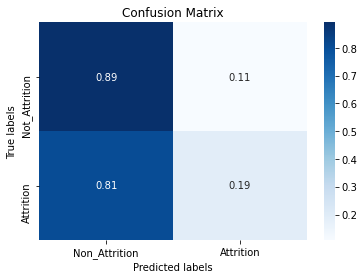

In [193]:
result_pred(y_true, y_pred)

# Predizione del target dopo aver fatto Undersampling

In [70]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [128]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X = original_df2[original_df2.columns[1:]]
y = original_df2["Attrition"]
X_over, y_over = undersample.fit_resample(X, y)
print(Counter(y_over))

Counter({'Attrition': 237, 'Not_Attrition': 237})


In [129]:
X_over["Attrition"] = y_over
new_df = X_over

In [130]:
original_df=new_df.copy()
for i in new_df.columns:
    new_df[i] = new_df[i].astype(str) + '/'+i

In [131]:
new_df

,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,...,YearsInCurrentRole_Range,YearsSinceLastPromotion_Range,YearsWithCurrManager_Range,DistanceFromHome_Range,Age_Range,PercentSalaryHike_Range,TotalWorkingYears_Range,TotalSatisfaction_Range,YearsAtCompany_Range,Attrition
0,Travel_Rarely/BusinessTravel,Sales/Department,3_Education/Education,Life Sciences/EducationField,Female/Gender,1_JobInvolvement/JobInvolvement,4_JobLevel/JobLevel,Sales Executive/JobRole,Married/MaritalStatus,7_NumCompaniesWorked/NumCompaniesWorked,...,>4 <=8_YearsInCurrentRole/YearsInCurrentRole_R...,>12_YearsSinceLastPromotion/YearsSinceLastProm...,>8 <=12_YearsWithCurrManager/YearsWithCurrMana...,>7 <=14_DistanceFromHome/DistanceFromHome_Range,<=31_Age/Age_Range,<=12_PercentSalaryHike/PercentSalaryHike_Range,>15_TotalWorkingYears/TotalWorkingYears_Range,Low_TotalSatisfaction/TotalSatisfaction_Range,<=10_YearsAtCompany/YearsAtCompany_Range,Attrition/Attrition
1,Travel_Rarely/BusinessTravel,Research & Development/Department,2_Education/Education,Medical/EducationField,Male/Gender,1_JobInvolvement/JobInvolvement,2_JobLevel/JobLevel,Healthcare Representative/JobRole,Married/MaritalStatus,5_NumCompaniesWorked/NumCompaniesWorked,...,<=4_YearsInCurrentRole/YearsInCurrentRole_Range,<=4_YearsSinceLastPromotion/YearsSinceLastProm...,<=4_YearsWithCurrManager/YearsWithCurrManager_...,>7 <=14_DistanceFromHome/DistanceFromHome_Range,>31 <=37_Age/Age_Range,>14 <=18_PercentSalaryHike/PercentSalaryHike_R...,>10 <=15_TotalWorkingYears/TotalWorkingYears_R...,Low_TotalSatisfaction/TotalSatisfaction_Range,<=10_YearsAtCompany/YearsAtCompany_Range,Attrition/Attrition
2,Travel_Rarely/BusinessTravel,Research & Development/Department,3_Education/Education,Medical/EducationField,Male/Gender,3_JobInvolvement/JobInvolvement,1_JobLevel/JobLevel,Research Scientist/JobRole,Single/MaritalStatus,0_NumCompaniesWorked/NumCompaniesWorked,...,<=4_YearsInCurrentRole/YearsInCurrentRole_Range,<=4_YearsSinceLastPromotion/YearsSinceLastProm...,<=4_YearsWithCurrManager/YearsWithCurrManager_...,>14_DistanceFromHome/DistanceFromHome_Range,>42 <=60_Age/Age_Range,>12 <=14_PercentSalaryHike/PercentSalaryHike_R...,<=6_TotalWorkingYears/TotalWorkingYears_Range,Low_TotalSatisfaction/TotalSatisfaction_Range,>20 <=30_YearsAtCompany/YearsAtCompany_Range,Attrition/Attrition
3,Travel_Frequently/BusinessTravel,Sales/Department,4_Education/Education,Marketing/EducationField,Male/Gender,2_JobInvolvement/JobInvolvement,2_JobLevel/JobLevel,Sales Executive/JobRole,Single/MaritalStatus,5_NumCompaniesWorked/NumCompaniesWorked,...,<=4_YearsInCurrentRole/YearsInCurrentRole_Range,<=4_YearsSinceLastPromotion/YearsSinceLastProm...,<=4_YearsWithCurrManager/YearsWithCurrManager_...,>14_DistanceFromHome/DistanceFromHome_Range,>37 <=42_Age/Age_Range,>14 <=18_PercentSalaryHike/PercentSalaryHike_R...,>6 <=10_TotalWorkingYears/TotalWorkingYears_Range,Low_TotalSatisfaction/TotalSatisfaction_Range,<=10_YearsAtCompany/YearsAtCompany_Range,Attrition/Attrition
4,Non-Travel/BusinessTravel,Research & Development/Department,3_Education/Education,Life Sciences/EducationField,Male/Gender,3_JobInvolvement/JobInvolvement,1_JobLevel/JobLevel,Laboratory Technician/JobRole,Married/MaritalStatus,4_NumCompaniesWorked/NumCompaniesWorked,...,<=4_YearsInCurrentRole/YearsInCurrentRole_Range,<=4_YearsSinceLastPromotion/YearsSinceLastProm...,<=4_YearsWithCurrManager/YearsWithCurrManager_...,>2 <=7_DistanceFromHome/DistanceFromHome_Range,<=31_Age/Age_Range,<=12_PercentSalaryHike/PercentSalaryHike_Range,>6 <=10_TotalWorkingYears/TotalWorkingYears_Range,Low_TotalSatisfaction/TotalSatisfaction_Range,<=10_YearsAtCompany/YearsAtCompany_Range,Attrition/Attrition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Travel_Rarely/BusinessTravel,Sales/Department,4_Education/Education,Life Sciences/EducationField,Male/Gender,2_JobInvolvement/JobInvolvem

In [208]:
baskets = new_df.values.tolist()

rules= apriori(baskets, target = "r", supp=20, conf=65, zmin=5, report='aScl', mode='o')
for i in rules:
    print("***** Antecedente della regola: ")
    print(i[1])
print(">>>> Lunghezza Regole: " + str(len(rules)))

***** Antecedente della regola: 
('<=6_TotalWorkingYears/TotalWorkingYears_Range', '1_JobLevel/JobLevel', 'Attrition/Attrition', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range')
***** Antecedente della regola: 
('<=6_TotalWorkingYears/TotalWorkingYears_Range', '1_JobLevel/JobLevel', 'Attrition/Attrition', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
***** Antecedente della regola: 
('<=6_TotalWorkingYears/TotalWorkingYears_Range', '1_JobLevel/JobLevel', 'Attrition/Attrition', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
***** Antecedente della regola: 
('<=6_TotalWorkingYears/TotalWorkingYears_Range', '1_JobLevel/JobLevel', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
***** 

('Not_Attrition/Attrition', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=10_YearsAtCompany/YearsAtCompany_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
***** Antecedente della regola: 
('Not_Attrition/Attrition', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=10_YearsAtCompany/YearsAtCompany_Range')
***** Antecedente della regola: 
('Not_Attrition/Attrition', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
***** Antecedente della regola: 
('Not_Attrition/Attrition', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=10_YearsAtCompany/YearsAtCompany_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
***** Antecedente della regola: 
('Not_Attrition/Attrition', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '

In [209]:
df_rules = pd.DataFrame(rules,columns=["conseq","antecedent","support_abs","support_perc","confidence","lift"])
df_rules = df_rules[df_rules["lift"]>=1]
print(len(df_rules))

1339


Considero solo le regole con conseguente "Not_Attrition"

In [210]:
regole_NotAttrition = df_rules[df_rules["conseq"] == "Not_Attrition/Attrition"].sort_values(["lift"], ascending=False)

In [211]:
len(regole_NotAttrition)

3

In [214]:
for i in regole_NotAttrition.values:
    print("**** REGOLA: ")
    print(i[1])
    print("> Support:")
    print(i[3])
    print("> Confidence:")
    print(i[4])
    print("> Lift:")
    print(i[5])

**** REGOLA: 
('Research & Development/Department', 'Not_OverTime/OverTime', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
20.253164556962027
> Confidence:
0.6808510638297872
> Lift:
1.3617021276595744
**** REGOLA: 
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=10_YearsAtCompany/YearsAtCompany_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
> Support:
20.253164556962027
> Confidence:
0.6530612244897959
> Lift:
1.3061224489795917
**** REGOLA: 
('Not_OverTime/OverTime', 'Travel_Rarely/BusinessTravel', '<=10_YearsAtCompany/YearsAtCompany_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
21.729957805907173
> Confidence:
0.6518987341772152
> Lift:
1.3037974683544304


Considero solo le regole con conseguente "Attrition"

In [212]:
regole_Attrition = df_rules[df_rules["conseq"] == "Attrition/Attrition"].sort_values(["lift"], ascending=False)

In [213]:
len(regole_Attrition)

19

In [215]:
for i in regole_Attrition.values:
    print("**** REGOLA: ")
    print(i[1])
    print("> Support:")
    print(i[3])
    print("> Confidence:")
    print(i[4])
    print("> Lift:")
    print(i[5])

**** REGOLA: 
('0_StockOptionLevel/StockOptionLevel', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range')
> Support:
23.839662447257385
> Confidence:
0.6932515337423313
> Lift:
1.3865030674846626
**** REGOLA: 
('0_StockOptionLevel/StockOptionLevel', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
20.464135021097047
> Confidence:
0.6928571428571428
> Lift:
1.3857142857142857
**** REGOLA: 
('0_StockOptionLevel/StockOptionLevel', '<=4_YearsWithCurrManager/YearsWithCurrManager_Range', '<=4_YearsInCurrentRole/YearsInCurrentRole_Range', '<=4_YearsSinceLastPromotion/YearsSinceLastPromotion_Range', '3.0_PerformanceRating/PerformanceRating')
> Support:
20.464135021097047
> Confidence:
0.6928571428571428
> Lift:
1.3857142857142857
**** REGOLA: 
('1_JobLevel/JobLevel', '<=4

Ordino il dataframe per lift discendente

In [138]:
regole_NotAttrition = regole_NotAttrition.sort_values(["lift"], ascending=False)
regole_Attrition = regole_Attrition.sort_values(["lift"], ascending=False)

In [139]:
pred = ["NotPredicted" for i in range(0, len(original_df))]

In [140]:
len(pred)

474

In [141]:
def predict_FromRules_2(pred, original_df, regole, att_val):
    for i in regole.values:
        antecedente = i[1]
        associazioni = {}
        for j in range(0, len(antecedente)):
            valore, attributo = antecedente[j].split("/")
            associazioni[attributo] = valore
        x = original_df.copy()
        for i in associazioni:
            x = x[x[i]==associazioni[i]]
        indici = list(x.index)
        for i in indici:
            if(pred[i] == "NotPredicted"):
                pred[i] = att_val
    return pred

In [142]:
pred = predict_FromRules_2(pred, original_df, regole_NotAttrition, "Not_Attrition")

In [143]:
pred = predict_FromRules_2(pred, original_df, regole_Attrition, "Attrition")

In [144]:
pred

['Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'NotPredicted',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'NotPredicted',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'NotPredicted',
 'Attrition',
 'Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Attrition',
 'NotPredicted',
 'NotPredicted',
 'Not_Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'NotPredicted',
 'NotPredicted',
 'Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Attrition',
 'NotPredicted',
 'Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Not_Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrition',
 'Attrition',
 'Not_Attrition',
 'Attrit

In [145]:
for i in range(0, len(pred)):
    if pred[i]=="NotPredicted":
        pred[i]= "Not_Attrition"

In [146]:
original_df["prediction"] = pred

In [147]:
original_df

,BusinessTravel,Department,Education,EducationField,Gender,JobInvolvement,JobLevel,JobRole,MaritalStatus,NumCompaniesWorked,...,YearsSinceLastPromotion_Range,YearsWithCurrManager_Range,DistanceFromHome_Range,Age_Range,PercentSalaryHike_Range,TotalWorkingYears_Range,TotalSatisfaction_Range,YearsAtCompany_Range,Attrition,prediction
0,Travel_Rarely,Sales,3_Education,Life Sciences,Female,1_JobInvolvement,4_JobLevel,Sales Executive,Married,7_NumCompaniesWorked,...,>12_YearsSinceLastPromotion,>8 <=12_YearsWithCurrManager,>7 <=14_DistanceFromHome,<=31_Age,<=12_PercentSalaryHike,>15_TotalWorkingYears,Low_TotalSatisfaction,<=10_YearsAtCompany,Attrition,Not_Attrition
1,Travel_Rarely,Research & Development,2_Education,Medical,Male,1_JobInvolvement,2_JobLevel,Healthcare Representative,Married,5_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,<=4_YearsWithCurrManager,>7 <=14_DistanceFromHome,>31 <=37_Age,>14 <=18_PercentSalaryHike,>10 <=15_TotalWorkingYears,Low_TotalSatisfaction,<=10_YearsAtCompany,Attrition,Not_Attrition
2,Travel_Rarely,Research & Development,3_Education,Medical,Male,3_JobInvolvement,1_JobLevel,Research Scientist,Single,0_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,<=4_YearsWithCurrManager,>14_DistanceFromHome,>42 <=60_Age,>12 <=14_PercentSalaryHike,<=6_TotalWorkingYears,Low_TotalSatisfaction,>20 <=30_YearsAtCompany,Attrition,Not_Attrition
3,Travel_Frequently,Sales,4_Education,Marketing,Male,2_JobInvolvement,2_JobLevel,Sales Executive,Single,5_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,<=4_YearsWithCurrManager,>14_DistanceFromHome,>37 <=42_Age,>14 <=18_PercentSalaryHike,>6 <=10_TotalWorkingYears,Low_TotalSatisfaction,<=10_YearsAtCompany,Attrition,Attrition
4,Non-Travel,Research & Development,3_Education,Life Sciences,Male,3_JobInvolvement,1_JobLevel,Laboratory Technician,Married,4_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,<=4_YearsWithCurrManager,>2 <=7_DistanceFromHome,<=31_Age,<=12_PercentSalaryHike,>6 <=10_TotalWorkingYears,Low_TotalSatisfaction,<=10_YearsAtCompany,Attrition,Not_Attrition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Travel_Rarely,Sales,4_Education,Life Sciences,Male,2_JobInvolvement,3_JobLevel,Sales Executive,Single,1_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,>8 <=12_YearsWithCurrManager,>7 <=14_DistanceFromHome,>31 <=37_Age,>14 <=18_PercentSalaryHike,>6 <=10_TotalWorkingYears,Low_TotalSatisfaction,>20 <=30_YearsAtCompany,Not_Attrition,Not_Attrition
470,Travel_Rarely,Research & Development,3_Education,Medical,Male,3_JobInvolvement,2_JobLevel,Research Scientist,Married,1_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,>4 <=8_YearsWithCurrManager,>7 <=14_DistanceFromHome,>31 <=37_Age,>14 <=18_PercentSalaryHike,>6 <=10_TotalWorkingYears,Low_TotalSatisfaction,>10 <=20_YearsAtCompany,Not_Attrition,Not_Attrition
471,Travel_Rarely,Research & Development,3_Education,Medical,Male,2_JobInvolvement,1_JobLevel,Laboratory Technician,Divorced,0_NumCompaniesWorked,...,>4 <=8_YearsSinceLastPromotion,>4 <=8_YearsWithCurrManager,<=2_DistanceFromHome,>31 <=37_Age,<=12_PercentSalaryHike,>6 <=10_TotalWorkingYears,Low_TotalSatisfaction,<=10_YearsAtCompany,Not_Attrition,Not_Attrition
472,Travel_Rarely,Sales,4_Education,Marketing,Male,3_JobInvolvement,2_JobLevel,Sales Executive,Single,2_NumCompaniesWorked,...,<=4_YearsSinceLastPromotion,>4 <=8_YearsWithCurrManager,>7 <=14_DistanceFromHome,>31 <=37_Age,<=12_PercentSalaryHike,>15_TotalWorkingYears,Medium_TotalSatisfaction,<=10_YearsAtCompany,Not_Attrition,Not_Attrition


In [148]:
original_df['Attrition'] = original_df['Attrition'].map(
    {"Attrition": 1, "Not_Attrition": 0}).astype(int)
original_df['prediction'] = original_df['prediction'].map(
    {"Attrition": 1, "Not_Attrition": 0}).astype(int)

In [149]:
y_true= original_df["Attrition"]
y_pred= original_df['prediction']

**** Matrice di Confusione *****
 True negative: 197 False negative: 127
 True positive: 110 False positive: 40
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.6477
Numero di campioni correttamente correlati:  307
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.7333
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.4641
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8312
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.5685
____________________________________________
[[0.83122363 0.16877637]
 [0.53586498 0.4641350

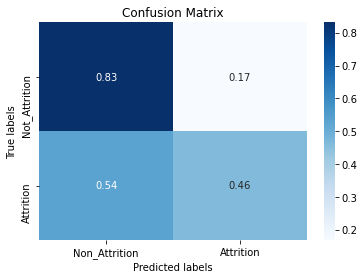

In [158]:
result_pred(y_true, y_pred)